In [10]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.advanced_activations import SReLU
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

We can now load our dataset from a file in the local directory.

The dataset is in fact not in CSV format in the UCI Machine Learning Repository, the attributes are instead separated by whitespace. We can load this easily using the pandas library. We can then split the input (X) and output (Y) attributes so that they are easier to model with Keras and scikit-learn.

In [11]:
# load dataset
iris_data = load_iris()

print(iris_data.keys())
print(iris_data['DESCR'])

df = pandas.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
df_descr = df.describe()
print(df_descr)

# split into input (X) and output (Y) variables
X = iris_data.data
Y = iris_data.target

dict_keys(['DESCR', 'target', 'target_names', 'data', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ==

In [3]:
# define base mode
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(output_dim=1, input_dim=4, init='normal', activation='relu')) #- активационная функция relu показала 
    #наилучший результат, активационная функция sigmoid наихудший
    #model.add(Dense(1)) - добавление слоя ухудшает результат
    model.add(Dense(1, init='normal', activation='relu'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['precision','recall']) #оптимайзер adam лучше, чем sgd
    return model

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=30, batch_size=5, verbose=0)

In [8]:
kfold = KFold(150,n_folds=4, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f)" % (results.mean()*100, results.std()*100))

Results: 1362.15 (1388.91)


In [14]:
from keras.callbacks import Callback
class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X)
            self.predictions.append(pred)
            
history = TrainingHistory()

In [17]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=4, init='normal', activation='relu')) #у сигмоидальной и тангенциальной функций 
#меньше ошибка по сравнению с relu. Relu обучается быстрее, но имеет бОльшую ошибку
model.add(Dense(1, init='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['precision','recall'])
    
model.fit(X,
          Y,
          nb_epoch=200,
          #verbose=0,
          callbacks=[history])

Epoch 1/200
150/150 [==============================] - 0s - loss: 1.5956 - precision: 0.0000e+00 - recall: 0.0000e+00     
Epoch 2/200
150/150 [==============================] - 0s - loss: 1.4262 - precision: 0.0000e+00 - recall: 0.0000e+00     
Epoch 3/200
150/150 [==============================] - 0s - loss: 1.2875 - precision: 0.0000e+00 - recall: 0.0000e+00     
Epoch 4/200
150/150 [==============================] - 0s - loss: 1.1745 - precision: 101333333.3333 - recall: 0.4945     
Epoch 5/200
150/150 [==============================] - 0s - loss: 1.0812 - precision: 100666666.6667 - recall: 0.5038     
Epoch 6/200
150/150 [==============================] - 0s - loss: 1.0043 - precision: 102000000.0000 - recall: 0.5033     
Epoch 7/200
150/150 [==============================] - 0s - loss: 0.9421 - precision: 102000000.0000 - recall: 0.4993     
Epoch 8/200
150/150 [==============================] - 0s - loss: 0.8920 - precision: 0.6667 - recall: 1.0000     
Epoch 9/200
150/150 [===

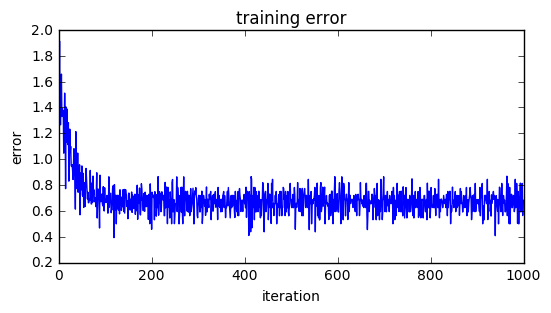

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')
plt.show()

In [22]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=4, init='normal', activation='sigmoid')) #у сигмоидальной и тангенциальной функций 
#меньше ошибка по сравнению с relu. Relu обучается быстрее, но имеет бОльшую ошибку
model.add(Dense(1, init='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['precision','recall'])
    
model.fit(X,
          Y,
          nb_epoch=200,
          #verbose=0,
          callbacks=[history])

Epoch 1/200
150/150 [==============================] - 0s - loss: 1.6047 - precision: 0.0000e+00 - recall: 0.0000e+00     
Epoch 2/200
150/150 [==============================] - 0s - loss: 1.4016 - precision: 0.0000e+00 - recall: 0.0000e+00     
Epoch 3/200
150/150 [==============================] - 0s - loss: 1.2396 - precision: 34533333.3333 - recall: 0.2010     
Epoch 4/200
150/150 [==============================] - 0s - loss: 1.1097 - precision: 102666666.6667 - recall: 0.4950     
Epoch 5/200
150/150 [==============================] - 0s - loss: 1.0025 - precision: 101333333.3333 - recall: 0.5054     
Epoch 6/200
150/150 [==============================] - 0s - loss: 0.9136 - precision: 40533333.8515 - recall: 0.6952     
Epoch 7/200
150/150 [==============================] - 0s - loss: 0.8435 - precision: 0.6667 - recall: 1.0000     
Epoch 8/200
150/150 [==============================] - 0s - loss: 0.7870 - precision: 0.6667 - recall: 1.0000     
Epoch 9/200
150/150 [=============

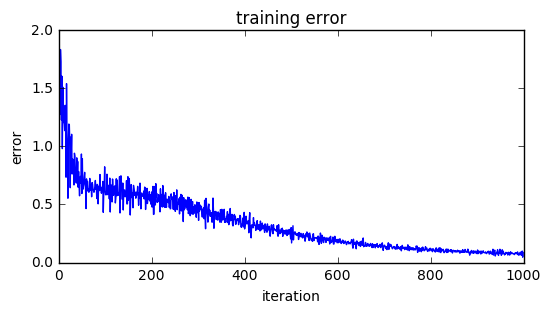

In [23]:
plt.figure(figsize=(6, 3))
plt.plot(history.losses)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')
plt.show()